In [5]:
import os
import pandas as pd
import collections 
import matplotlib.pyplot as plt
import numpy as np
import copy
import re
from numpy.polynomial.polynomial import polyfit
import statsmodels.api as sm
from datetime import date
from datetime import datetime
from statistics import median

In [6]:
os.chdir('C:/Users/tjame/Documents/Curious Learning')

###sort values with python, whereas previously they were sorted on excel
englishAllOriginal = pd.read_csv('all english.csv').drop_duplicates()
englishAll = englishAllOriginal.drop('country', axis =1)
englishAll = englishAll.drop_duplicates()
englishAll.sort_values(["ID", "Time"], axis=0, ascending=True, inplace=True)

In [12]:
###############Downloaders 
#only downloaders from Sept 2018-Aug 2018 taken from google play console
englishAllDownloaders = 5710

#downloaders from Aug 2017-Sept 2018 taken from google play console
englishPreAllDownloaders = 8128

def date_diff_in_seconds(time1, time2):
    d1 = datetime.fromtimestamp(time1/1000000)
    d2 = datetime.fromtimestamp(time2/1000000)
    
    delta = abs((d2 - d1).seconds)
  
    return delta

englishAllDict = dict()
count = 0
time = 0
time1 = 0
time2 =0
levelTime = 0
while(count<len(englishAll)):
    
    i = englishAll.iloc[count][0]
    
    if(i not in englishAllDict):
        englishAllDict[i]=dict()

    if(englishAll.iloc[count][2][:12]=='SegmentStart'):
        if(count == 0):
            time1=englishAll.iloc[count][3]
            if(englishAll.iloc[count+2][1]=='label'):
                count+=3
            else:
                count+=2
        else:
            if(englishAll.iloc[count-2][2][:13] == 'SelectMonster' or englishAll.iloc[count-2][2][:5] == 'Level'):
                time1 = englishAll.iloc[count][3]
                if(englishAll.iloc[count+2][1]=='label'):
                    count+=3
                else:
                    count+=2
            else:
                if(englishAll.iloc[count][2].split("_",1)[1] == englishAll.iloc[count-2][2].split("_",1)[1] ):
                    time1=englishAll.iloc[count][3]
                    if(englishAll.iloc[count+2][1]=='label'):
                        count+=3
                    else:
                        count+=2
                else:
                    levelTime = 0
                    time1=englishAll.iloc[count][3]
                    if(englishAll.iloc[count+2][1]=='label'):
                        count+=3
                    else:
                        count+=2           
                    
        
    elif(englishAll.iloc[count][2][:14]=='SegmentSuccess' or englishAll.iloc[count][2][0:11]=='SegmentFail'):
        time2=englishAll.iloc[count][3]
        time = date_diff_in_seconds(time1, time2)
        if(time<300):
            levelTime = levelTime + time        
        if(englishAll.iloc[count+2][1]=='label'):
            count+=3
        else:
            count+=2
        
    elif(englishAll.iloc[count][2][:12]=='LevelSuccess' or englishAll.iloc[count][2][:9]=='LevelFail'):            
        level = 'Level ' + englishAll.iloc[count][2].split("_",1)[1]
        sf = (englishAll.iloc[count][2].split("_",1)[0]).split("Level",1)[1]
        
        if(level in englishAllDict[i]):
            levelTime = 0
        else:
            dte = datetime.fromtimestamp(time2/1000000).strftime('%m/%d/%Y-%A')
            englishAllDict[i][level] = [] 
            englishAllDict[i][level].append(levelTime)
            englishAllDict[i][level].append(sf)
            englishAllDict[i][level].append(dte)
    
            levelTime = 0
        
        if(englishAll.iloc[count+2][1]=='label'):
            count+=3
        else:
            count+=2

    else:
        if(englishAll.iloc[count+2][1]=='label'):
            count+=3
        else:
            count+=2
            

IndexError: single positional indexer is out-of-bounds

In [16]:
###summary statistics

#mean time per user
#median time per user
#max time per user

totTimeEnglish = dict()
count = 1
for i in englishAllDict:
    totTimeEnglish[count] = 0
    for j in englishAllDict[i]:
        for k in englishAllDict[i][j]:
            if(type(k)==int):
                    totTimeEnglish[count] = totTimeEnglish[count] + k
    count = count +1
    
sorted_totTimeEnglish = sorted(totTimeEnglish.items(), key=lambda kv: kv[1], reverse = True)
totTimeEnglish = collections.OrderedDict(sorted_totTimeEnglish)

print("Mean time spent in minutes is: " + str(np.mean(list(totTimeEnglish.values()))/60))
print("Median time spent in minutes is: " + str(np.median(list(totTimeEnglish.values()))/60))
print("Max time spent in minutes is: " + str(max(totTimeEnglish.values())/(60)))


#mean levels completed
#median levels completed
#max levels completed

levelsEnglish = dict()
for i in englishAllDict:
    levelsEnglish[i] = len(englishAllDict[i])
levelsEnglish = sorted(levelsEnglish.items(), key=lambda kv: kv[1], reverse = True)
levelsEnglish =collections.OrderedDict(levelsEnglish)

print("Mean levels completed is: " + str(np.mean(list(levelsEnglish.values()))))
print("Median levels completed is: " + str(np.median(list(levelsEnglish.values()))))
print("Max levels completed is: " + str(max(levelsEnglish.values())))



Mean time spent in minutes is: 12.89800095089903
Median time spent in minutes is: 4.908333333333333
Max time spent in minutes is: 113.95
Mean levels completed is: 12.662733402489627
Median levels completed is: 5.0
Max levels completed is: 77


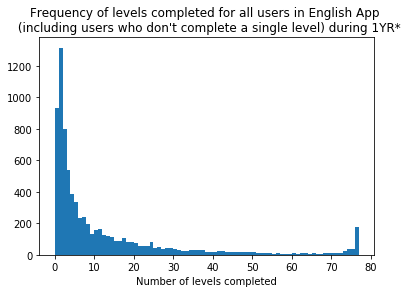

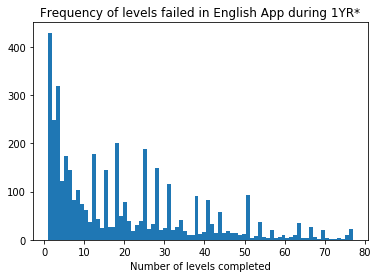

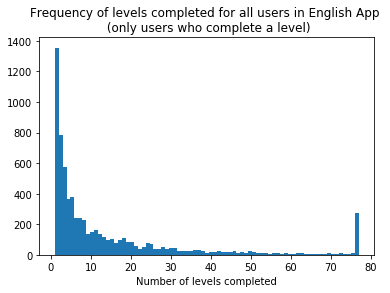

In [23]:
totalCompleted = dict()
levelsFailed = []
for i in englishAllDict:
    if (englishAllDict[i]):
        lvls = []
        for j in englishAllDict[i]:
            lvl = int(float(re.sub('[^0-9]','', j)))
            if(englishAllDict[i][j][1] == 'Success'):
                lvls.append(lvl)
            else:
                levelsFailed.append(lvl)
        
        totalCompleted[i] = len(lvls)
    else:
        totalCompleted[i]=0
        

plt.hist(totalCompleted.values(), bins =77)
plt.title("Frequency of levels completed for all users in English App \n (including users who don't complete a single level) during 1YR*")
plt.xlabel("Number of levels completed")
plt.show()

plt.hist(levelsFailed, bins =77)
plt.title("Frequency of levels failed in English App during 1YR*")
plt.xlabel("Number of levels completed")
plt.show()


totalCompleted = dict()
for i in englishAllDict:
    if (englishAllDict[i]):
        lvls = []
        for j in englishAllDict[i]:
            lvl = int(float(re.sub('[^0-9]','', j)))
            lvls.append(lvl)
        
        totalCompleted[i] = len(lvls)


plt.hist(totalCompleted.values(), bins =77)
plt.title("Frequency of levels completed for all users in English App \n (only users who complete a level)")
plt.xlabel("Number of levels completed")
plt.show()


In [18]:
#### creating the linear users, non-linear users, linear engagers and learners, non-linear engagers and learners, 
####and high Achievers cohorts

def linearLevels(langDct):
    linear = dict()
    for i in langDct:
        if(len(langDct[i]) ==1):
           pass
        else:
            l = []
            for j in langDct[i]:
                l.append(int(j.split(" ",1)[1]))
            if(l):
                if(l == list(range(min(l), max(l)+1))):
                    linear[i] = copy.deepcopy(langDct[i])
    return linear

def nonLinearLevels(linear, langDct):
    nonLinear = dict()
    for i in langDct:
        if(i not in linear and len(langDct[i])>1):
            nonLinear[i] = copy.deepcopy(langDct[i])
    return nonLinear


linearEnglish = linearLevels(englishAllDict)
nonLinearEnglish = nonLinearLevels(linearEnglish, englishAllDict)

linearEngagersEnglish = dict()
linearLearnersEnglish = dict()

engager = False
learner = False
for i in linearEnglish:
    lvls = []
    for j in linearEnglish[i]:
        lvl = int(float(re.sub('[^0-9]','', j)))
        if(linearEnglish[i][j][1] == 'Success'):
            lvls.append(lvl)
    for k in lvls:
        if (k>=5):
            engager = True
        if (k >= 10):
            learner = True
    if(engager):
        linearEngagersEnglish[i] = copy.deepcopy(linearEnglish[i])
        engager = False
    if(learner):
        linearLearnersEnglish[i] = copy.deepcopy(linearEnglish[i])
        learner = False
        
nonLinearEngagersEnglish = dict()
nonLinearLearnersEnglish = dict()

engager = False
learner = False
for i in nonLinearEnglish:
    lvls = []
    for j in nonLinearEnglish[i]:
        lvl = int(float(re.sub('[^0-9]','', j)))
        if(nonLinearEnglish[i][j][1] == 'Success'):
            lvls.append(lvl)
    for k in lvls:
        if (k>=5):
            engager = True
        if (k >= 10):
            learner = True
    if(engager):
        nonLinearEngagersEnglish[i] = copy.deepcopy(nonLinearEnglish[i])
        engager = False
    if(learner):
        nonLinearLearnersEnglish[i] = copy.deepcopy(nonLinearEnglish[i])
        learner = False    

highAEnglish = dict()
for i in englishAllDict:
    if(len(englishAllDict[i])==77):
        highAEnglish[i] = copy.deepcopy(englishAllDict[i])


In [19]:
englishAllEngagers = dict()
englishAllLearners = dict()
engager = False
learner = False
    
for i in englishAllDict:
    if (englishAllDict[i]):
        lvls = []
        for j in englishAllDict[i]:
            lvl = int(float(re.sub('[^0-9]','', j)))
            if(englishAllDict[i][j][1] == 'Success'):
                lvls.append(lvl)
        for k in lvls:
            if (k>=5):
                engager = True
            if (k >= 10):
                learner = True
        if(engager):
            englishAllEngagers[i] = copy.deepcopy(englishAllDict[i])
            engager = False
        if(learner):
            englishAllLearners[i] = copy.deepcopy(englishAllDict[i])
            learner = False
            
            
resEnglishAllEngagers = dict()
for i in englishAllEngagers:
    totTime = 0
    fail = False
    count = 0 
    
    resLevels = []
    
    for j in englishAllEngagers[i]:
        lvl = int(float(re.sub('[^0-9]','', j)))
        if(lvl<=5):
            resLevels.append(j)
    
    for k in resLevels:
        totTime += englishAllEngagers[i][k][0]
        if(englishAllEngagers[i][j][1] == 'Fail'):
            fail = True
        count += 1
        
    if(totTime>600 or fail):
        resEnglishAllEngagers[i] = copy.deepcopy(englishAllEngagers[i])

###regression engagers are engagers, excluding the reslient engagers, a crucial distinction for regression analysis
regressionEngagers = dict()
for i in englishAllEngagers:
    if(i in resEnglishAllEngagers):
        pass
    else:
        regressionEngagers[i] = copy.deepcopy(englishAllEngagers[i])
        
resEnglishAllLearners = dict()
for i in englishAllLearners:
    totTime = 0
    fail = False
    count = 0 
    
    resLevels = []
    
    for j in englishAllLearners[i]:
        lvl = int(float(re.sub('[^0-9]','', j)))
        if(lvl<=10):
            resLevels.append(j)
    
    for k in resLevels:
        totTime += englishAllLearners[i][k][0]
        if(englishAllLearners[i][j][1] == 'Fail'):
            fail = True
        count += 1
        
    if(totTime>1200 or fail):
        resEnglishAllLearners[i] = copy.deepcopy(englishAllLearners[i])

###regression engagers are learners, excluding the reslient learners
regressionLearners = dict()
for i in englishAllLearners:
    if(i in resEnglishAllLearners):
        pass
    else:
        regressionLearners[i] = copy.deepcopy(englishAllLearners[i])

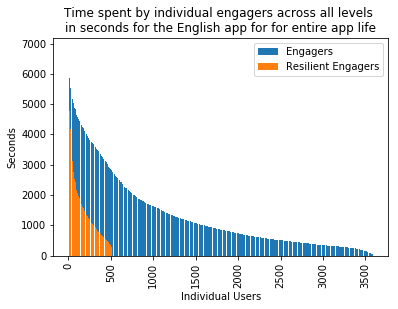

In [20]:
### basic engagement analysis for engagers
engagTimeEnglish = dict()
count = 1
for i in regressionEngagers:
    engagTimeEnglish[count] = 0
    for j in regressionEngagers[i]:
        for k in regressionEngagers[i][j]:
            if(type(k)==int):
                    engagTimeEnglish[count] = engagTimeEnglish[count] + k
    count = count +1
    
sorted_engagTimeEnglish = sorted(engagTimeEnglish.items(), key=lambda kv: kv[1], reverse = True)
engagTimeEnglish = collections.OrderedDict(sorted_engagTimeEnglish)

engagCountEnglish = []
count = 0
while(count<len(regressionEngagers)):
    engagCountEnglish.append(count+1)
    count = count+1
    
resEngagTimeEnglish = dict()
count = 1
for i in resEnglishAllEngagers:
    resEngagTimeEnglish[count] = 0
    for j in resEnglishAllEngagers[i]:
        for k in resEnglishAllEngagers[i][j]:
            if(type(k)==int):
                    resEngagTimeEnglish[count] = resEngagTimeEnglish[count] + k
    count = count +1
    
sorted_resEngagTimeEnglish = sorted(resEngagTimeEnglish.items(), key=lambda kv: kv[1], reverse = True)
resEngagTimeEnglish = collections.OrderedDict(sorted_resEngagTimeEnglish)

resEngagCountEnglish = []
count = 0
while(count<len(resEnglishAllEngagers)):
    resEngagCountEnglish.append(count+1)
    count = count+1

plt.bar(engagCountEnglish, engagTimeEnglish.values())
plt.bar(resEngagCountEnglish, resEngagTimeEnglish.values())
plt.title("Time spent by individual engagers across all levels \nin seconds for the English app for for entire app life")
plt.tick_params(axis='x', labelrotation=90)
plt.xlabel("Individual Users")
plt.ylabel("Seconds")
plt.legend(['Engagers', 'Resilient Engagers'])
plt.show()

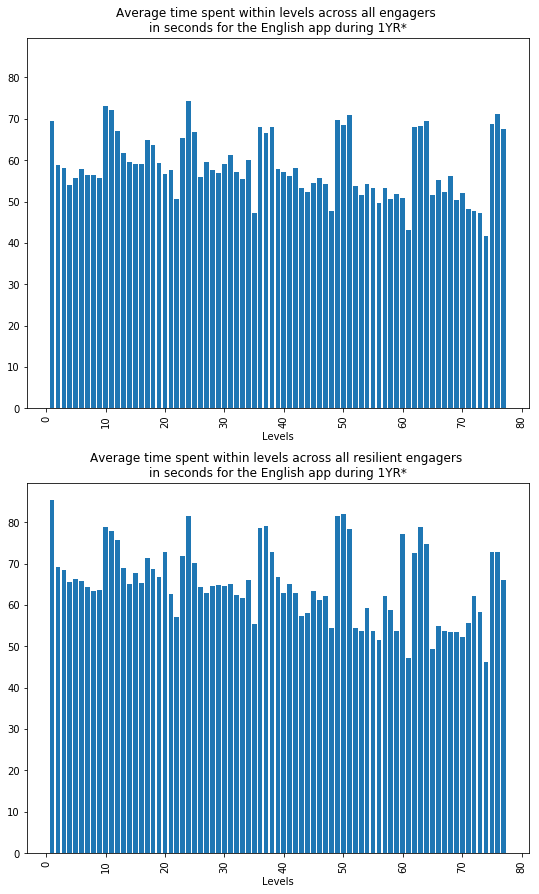

In [21]:
### avg time spent across levels for engagers
engagPerLevelEnglish = dict()
levelsEngagEnglish = dict()
for i in regressionEngagers:
    for j in regressionEngagers[i]:
        lvl = int(j.split(" ",1)[1])
        if(lvl not in levelsEngagEnglish):
            levelsEngagEnglish[lvl] =0
            engagPerLevelEnglish[lvl] = 0
            for k in regressionEngagers[i][j]:
                if(type(k)==int):
                    levelsEngagEnglish[lvl] = levelsEngagEnglish[lvl] + k
                    engagPerLevelEnglish[lvl] = engagPerLevelEnglish[lvl] +1
        else:           
            lvl = int(j.split(" ",1)[1])
            for k in regressionEngagers[i][j]:
                if(type(k)==int):
                    levelsEngagEnglish[lvl] = levelsEngagEnglish[lvl] + k
                    engagPerLevelEnglish[lvl] = engagPerLevelEnglish[lvl] +1

levelsEngagEnglish = collections.OrderedDict(sorted(levelsEngagEnglish.items()))
engagPerLevelEnglish = collections.OrderedDict(sorted(engagPerLevelEnglish.items()))

avgEngagEnglish = dict()
for i in levelsEngagEnglish:
    avgEngagEnglish[i] = 0 
    avgEngagEnglish[i] = (levelsEngagEnglish[i]/engagPerLevelEnglish[i])

resEngagPerLevelEnglish = dict()
levelsResEngagEnglish = dict()
for i in resEnglishAllEngagers:
    for j in resEnglishAllEngagers[i]:
        lvl = int(j.split(" ",1)[1])
        if(lvl not in levelsResEngagEnglish):
            levelsResEngagEnglish[lvl] =0
            resEngagPerLevelEnglish[lvl] = 0
            for k in resEnglishAllEngagers[i][j]:
                if(type(k)==int):
                    levelsResEngagEnglish[lvl] = levelsResEngagEnglish[lvl] + k
                    resEngagPerLevelEnglish[lvl] = resEngagPerLevelEnglish[lvl] +1
        else:           
            lvl = int(j.split(" ",1)[1])
            for k in resEnglishAllEngagers[i][j]:
                if(type(k)==int):
                    levelsResEngagEnglish[lvl] = levelsResEngagEnglish[lvl] + k
                    resEngagPerLevelEnglish[lvl] = resEngagPerLevelEnglish[lvl] +1

levelsResEngagEnglish = collections.OrderedDict(sorted(levelsResEngagEnglish.items()))
resEngagPerLevelEnglish = collections.OrderedDict(sorted(resEngagPerLevelEnglish.items()))

avgResEngagEnglish = dict()
for i in levelsResEngagEnglish:
    avgResEngagEnglish[i] = 0 
    avgResEngagEnglish[i] = (levelsResEngagEnglish[i]/resEngagPerLevelEnglish[i])



fig = plt.figure(figsize = (9,15))
ax1 = fig.add_subplot(211)

ax1.bar(avgEngagEnglish.keys(), avgEngagEnglish.values())
plt.tick_params(axis='x', labelrotation=90)
ax1.set_title("Average time spent within levels across all engagers \nin seconds for the English app during 1YR*")
plt.xlabel("Levels")

ax2 = fig.add_subplot(212, sharey = ax1)
ax2.bar(avgResEngagEnglish.keys(), avgResEngagEnglish.values())
plt.tick_params(axis='x', labelrotation=90)
ax2.set_title("Average time spent within levels across all resilient engagers \nin seconds for the English app during 1YR*")
plt.xlabel("Levels")
plt.show()

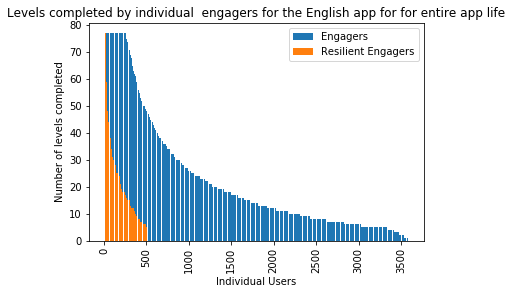

In [24]:
####levels completed for engagers
lcEngagEnglish = dict()
for i in regressionEngagers:
    lcEngagEnglish[i] = len(regressionEngagers[i])
lcEngagEnglish = sorted(lcEngagEnglish.items(), key=lambda kv: kv[1], reverse = True)
lcEngagEnglish =collections.OrderedDict(lcEngagEnglish)

lcResEngagEnglish = dict()
for i in resEnglishAllEngagers:
    lcResEngagEnglish[i] = len(resEnglishAllEngagers[i])
lcResEngagEnglish = sorted(lcResEngagEnglish.items(), key=lambda kv: kv[1], reverse = True)
lcResEngagEnglish =collections.OrderedDict(lcResEngagEnglish)


plt.bar(engagCountEnglish, lcEngagEnglish.values())
plt.bar(resEngagCountEnglish, lcResEngagEnglish.values())
plt.tick_params(axis='x', labelrotation=90)
plt.title("Levels completed by individual  engagers for the English app for for entire app life")
plt.xlabel("Individual Users")
plt.ylabel("Number of levels completed")
plt.legend(['Engagers', 'Resilient Engagers'])
plt.show()


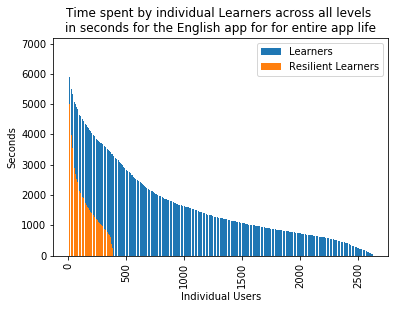

In [25]:
##########################engagement analysis for Learners

learnTimeEnglish = dict()
        
count = 1
for i in regressionLearners:
    learnTimeEnglish[count] = 0
    for j in regressionLearners[i]:
        for k in regressionLearners[i][j]:
            if(type(k)==int):
                    learnTimeEnglish[count] = learnTimeEnglish[count] + k
    count = count +1
    
sorted_learnTimeEnglish = sorted(learnTimeEnglish.items(), key=lambda kv: kv[1], reverse = True)
learnTimeEnglish = collections.OrderedDict(sorted_learnTimeEnglish)

learnCountEnglish = []
count = 0
while(count<len(regressionLearners)):
    learnCountEnglish.append(count+1)
    count = count+1
    
resLearnTimeEnglish = dict()
count = 1
for i in resEnglishAllLearners:
    resLearnTimeEnglish[count] = 0
    for j in resEnglishAllLearners[i]:
        for k in resEnglishAllLearners[i][j]:
            if(type(k)==int):
                    resLearnTimeEnglish[count] = resLearnTimeEnglish[count] + k
    count = count +1
    
sorted_resLearnTimeEnglish = sorted(resLearnTimeEnglish.items(), key=lambda kv: kv[1], reverse = True)
resLearnTimeEnglish = collections.OrderedDict(sorted_resLearnTimeEnglish)

resLearnCountEnglish = []
count = 0
while(count<len(resEnglishAllLearners)):
    resLearnCountEnglish.append(count+1)
    count = count+1

plt.bar(learnCountEnglish, learnTimeEnglish.values())
plt.bar(resLearnCountEnglish, resLearnTimeEnglish.values())
plt.title("Time spent by individual Learners across all levels \nin seconds for the English app for for entire app life")
plt.tick_params(axis='x', labelrotation=90)
plt.xlabel("Individual Users")
plt.ylabel("Seconds")
plt.legend(['Learners', 'Resilient Learners'])
plt.show()

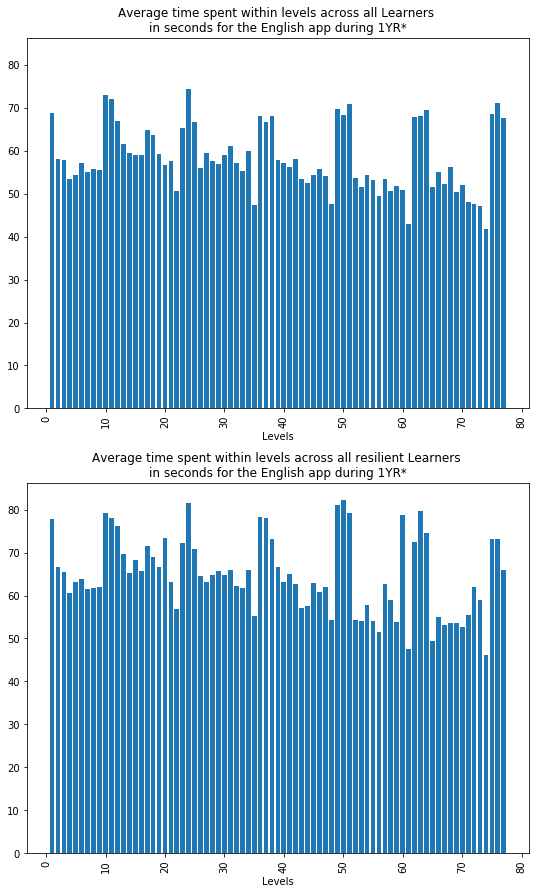

In [26]:
###  avg time per level analysis
timePerLevelLearnEnglish = dict()
for i in regressionLearners:
    for j in regressionLearners[i]:
        lvl = int(j.split(" ",1)[1])
        if(lvl not in timePerLevelLearnEnglish):
            timePerLevelLearnEnglish[lvl] =[]
            for k in regressionLearners[i][j]:
                if(type(k)==int):
                    timePerLevelLearnEnglish[lvl].append(k)
        else:           
            lvl = int(j.split(" ",1)[1])
            for k in regressionLearners[i][j]:
                if(type(k)==int):
                    timePerLevelLearnEnglish[lvl].append(k)

timePerLevelLearnEnglish = dict(collections.OrderedDict(sorted(timePerLevelLearnEnglish.items())))

avgLearnEnglish = dict()
for i in timePerLevelLearnEnglish:
    avgLearnEnglish[i] = 0 
    avgLearnEnglish[i] = (sum(timePerLevelLearnEnglish[i])/len(timePerLevelLearnEnglish[i]))


timePerLevelResLearnEnglish = dict()
for i in resEnglishAllLearners:
    for j in resEnglishAllLearners[i]:
        lvl = int(j.split(" ",1)[1])
        if(lvl not in timePerLevelResLearnEnglish):
            timePerLevelResLearnEnglish[lvl] =[]
            for k in resEnglishAllLearners[i][j]:
                if(type(k)==int):
                    timePerLevelResLearnEnglish[lvl].append(k)
        else:           
            lvl = int(j.split(" ",1)[1])
            for k in resEnglishAllLearners[i][j]:
                if(type(k)==int):
                    timePerLevelResLearnEnglish[lvl].append(k)

timePerLevelResLearnEnglish = dict(collections.OrderedDict(sorted(timePerLevelResLearnEnglish.items())))

avgResLearnEnglish = dict()
for i in timePerLevelResLearnEnglish:
    avgResLearnEnglish[i] = 0 
    avgResLearnEnglish[i] = (sum(timePerLevelResLearnEnglish[i])/len(timePerLevelResLearnEnglish[i]))


fig = plt.figure(figsize = (9,15))
ax1 = fig.add_subplot(211)

ax1.bar(avgLearnEnglish.keys(), avgLearnEnglish.values())
plt.tick_params(axis='x', labelrotation=90)
ax1.set_title("Average time spent within levels across all Learners \nin seconds for the English app during 1YR*")
plt.xlabel("Levels")

ax2 = fig.add_subplot(212, sharey = ax1)
ax2.bar(avgResLearnEnglish.keys(), avgResLearnEnglish.values())
plt.tick_params(axis='x', labelrotation=90)
ax2.set_title("Average time spent within levels across all resilient Learners \nin seconds for the English app during 1YR*")
plt.xlabel("Levels")
plt.show()

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.105
Model:                            OLS   Adj. R-squared:                  0.093
Method:                 Least Squares   F-statistic:                     8.796
Date:                Thu, 22 Aug 2019   Prob (F-statistic):            0.00405
Time:                        12:07:09   Log-Likelihood:                -259.75
No. Observations:                  77   AIC:                             523.5
Df Residuals:                      75   BIC:                             528.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         58.3855      1.647     35.460      0.0

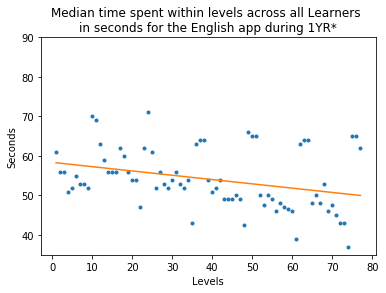

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.099
Model:                            OLS   Adj. R-squared:                  0.087
Method:                 Least Squares   F-statistic:                     8.243
Date:                Thu, 22 Aug 2019   Prob (F-statistic):            0.00532
Time:                        12:07:09   Log-Likelihood:                -269.72
No. Observations:                  77   AIC:                             543.4
Df Residuals:                      75   BIC:                             548.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         65.2917      1.874     34.838      0.0

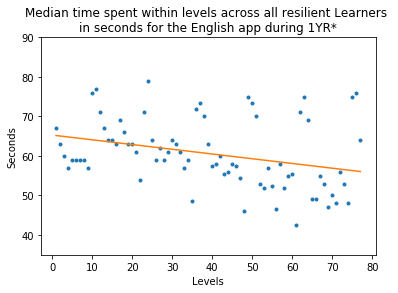

In [27]:
####median times spent per level for learners and resilient learners
medLearnEnglish = dict()
for i in timePerLevelLearnEnglish:
    medLearnEnglish[i] = (median(timePerLevelLearnEnglish[i]))

medResLearnEnglish = dict()
for i in timePerLevelResLearnEnglish:
    medResLearnEnglish[i] = (median(timePerLevelResLearnEnglish[i]))


x = np.arange(start = 1, stop =78)
y = list(medLearnEnglish.values())
model1 = sm.OLS(y, x)
x = sm.add_constant(x)
model1 = sm.OLS(y, x)
results = model1.fit()
print(results.summary())

x = np.arange(start = 1, stop =78)
b, m = polyfit(x, y, 1)
plt.plot(x, y, '.')
plt.plot(x, b + m * x, '-')
plt.ylim([35,90])
plt.title("Median time spent within levels across all Learners \nin seconds for the English app during 1YR*")
plt.xlabel("Levels")
plt.ylabel("Seconds")
plt.show()

x = np.arange(start = 1, stop =78)
resy = list(medResLearnEnglish.values())
model2 = sm.OLS(resy, x)
x = sm.add_constant(x)
model2 = sm.OLS(resy, x)
results = model2.fit()
print(results.summary())

x = np.arange(start = 1, stop =78)
b, m = polyfit(x, resy, 1)
plt.plot(x, resy, '.')
plt.plot(x, b + m * x, '-')
plt.ylim([35,90])
plt.title("Median time spent within levels across all resilient Learners \nin seconds for the English app during 1YR*")
plt.xlabel("Levels")
plt.ylabel("Seconds")
plt.show()

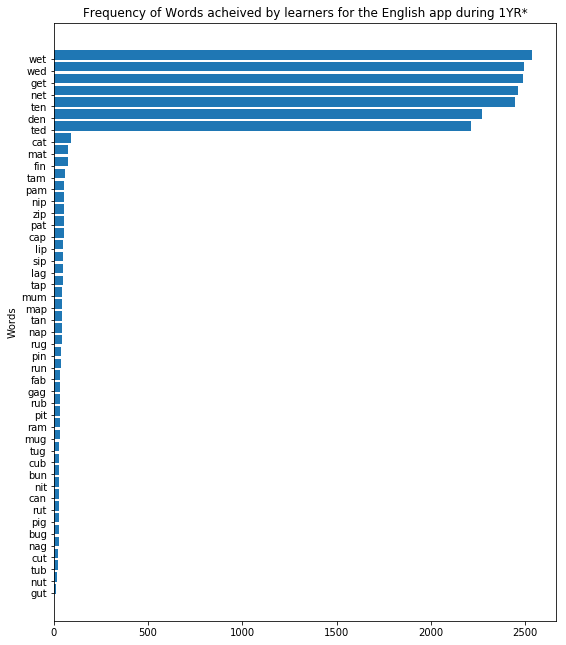

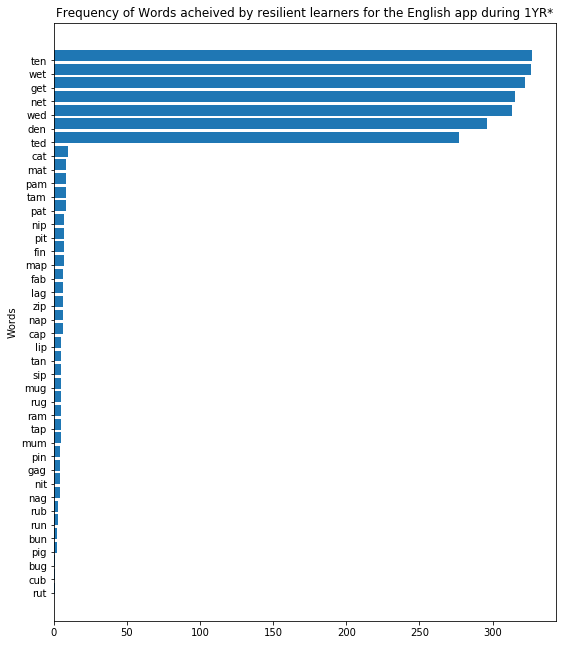

In [49]:
################################# WORDS
learnersAllEnglish = englishAll[englishAll['ID'].isin(englishAllLearners.keys())]

###frequency of learners words
learnWordsEnglish = dict()
count = 0
user = learnersAllEnglish.iloc[0][0]
while(count<len(learnersAllEnglish)):
    user = learnersAllEnglish.iloc[count][0]
    if(learnersAllEnglish.iloc[count][2][:14]=='SegmentSuccess'):
        if(learnersAllEnglish.iloc[count+1][2][0:11] == 'Puzzle Word' or learnersAllEnglish.iloc[count+1][2][0:17] == 'Puzzle Sound Word'):
            if(user not in learnWordsEnglish):
                learnWordsEnglish[user] =[]
        
            word = learnersAllEnglish.iloc[count+1][2].split(": ", 1)[1]
            if(word not in learnWordsEnglish[user]):
                learnWordsEnglish[user].append(word)
    count = count + 2

    

w=[]
for i in learnWordsEnglish:
    for j in learnWordsEnglish[i]:
        w.append(j)

from collections import Counter

counts = Counter(w)

labels, values = zip(*counts.items())

indSort = np.argsort(values)[::-1]

labels = np.array(labels)[indSort]
values = np.array(values)[indSort]

indexes = np.arange(len(labels))

bar_width = 0.35
fig = plt.figure(1, figsize=(9, 11))
ax = fig.add_subplot(111)
ax.barh(indexes, values)
plt.gca().invert_yaxis()
plt.yticks(indexes + bar_width, labels)
plt.title("Frequency of Words acheived by learners for the English app during 1YR*")
plt.ylabel("Words")
plt.show()

###frequency of resilient learners words
resLearnWordsEnglish = dict()
count = 0
user = learnersAllEnglish.iloc[0][0]
while(count<len(learnersAllEnglish)):
    user = learnersAllEnglish.iloc[count][0]
    if(user not in resEnglishAllLearners):
        pass
    else:
        if(learnersAllEnglish.iloc[count][2][:14]=='SegmentSuccess'):
            if(learnersAllEnglish.iloc[count+1][2][0:11] == 'Puzzle Word' or learnersAllEnglish.iloc[count+1][2][0:17] == 'Puzzle Sound Word'):
                if(user not in resLearnWordsEnglish):
                    resLearnWordsEnglish[user] =[]
            
                word = learnersAllEnglish.iloc[count+1][2].split(": ", 1)[1]
                if(word not in resLearnWordsEnglish[user]):
                    resLearnWordsEnglish[user].append(word)
    count = count + 2
    
w=[]
for i in resLearnWordsEnglish:
    for j in resLearnWordsEnglish[i]:
        w.append(j)

counts = Counter(w)

labels, values = zip(*counts.items())

indSort = np.argsort(values)[::-1]

labels = np.array(labels)[indSort]
values = np.array(values)[indSort]

indexes = np.arange(len(labels))

bar_width = 0.35
fig = plt.figure(1, figsize=(9,11))
ax = fig.add_subplot(111)
ax.barh(indexes, values)
plt.gca().invert_yaxis()
plt.yticks(indexes + bar_width, labels)
plt.title("Frequency of Words acheived by resilient learners for the English app during 1YR*")
plt.ylabel("Words")
plt.show()


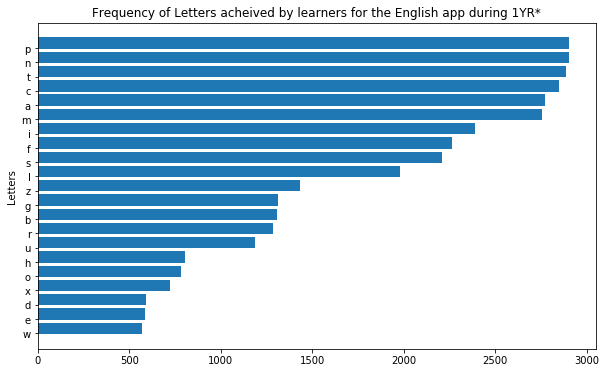

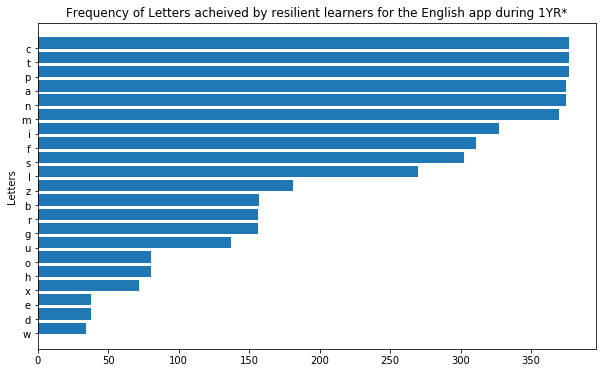

In [50]:
###frequency of learners letters


learnLettersEnglish =dict()
count = 0
while(count<len(learnersAllEnglish)):
    user = learnersAllEnglish.iloc[count][0]
    if(learnersAllEnglish.iloc[count][2][:14]=='SegmentSuccess'):
        if(learnersAllEnglish.iloc[count+1][2][0:13] == 'Puzzle Letter' or learnersAllEnglish.iloc[count+1][2][0:19] == 'Puzzle Sound Letter'):
            if(user not in learnLettersEnglish):
                    learnLettersEnglish[user] =[]
            
            letter = learnersAllEnglish.iloc[count+1][2].split(": ", 1)[1]
            if(letter not in learnLettersEnglish[user]):
                learnLettersEnglish[user].append(letter)
    count = count + 2
    

l=[]
for i in learnLettersEnglish:
    for j in learnLettersEnglish[i]:
        if(len(j)==1 and not j=='('):
            l.append(j)

counts = Counter(l)

labels, values = zip(*counts.items())

indSort = np.argsort(values)[::-1]

labels = np.array(labels)[indSort]
values = np.array(values)[indSort]

indexes = np.arange(len(labels))

bar_width = 0.35
fig = plt.figure(1, figsize=(10, 6))
ax = fig.add_subplot(111)
ax.barh(indexes, values)
plt.gca().invert_yaxis()
plt.yticks(indexes + bar_width, labels)
plt.title("Frequency of Letters acheived by learners for the English app during 1YR*")
plt.ylabel("Letters")
plt.show()


#####
resLearnLettersEnglish  =dict()
count = 0
while(count<len(learnersAllEnglish)):
    user = learnersAllEnglish.iloc[count][0]
    if(user not in resEnglishAllLearners):
        pass
    else:
        if(learnersAllEnglish.iloc[count][2][:14]=='SegmentSuccess'):
            if(learnersAllEnglish.iloc[count+1][2][0:13] == 'Puzzle Letter' or learnersAllEnglish.iloc[count+1][2][0:19] == 'Puzzle Sound Letter'):
                if(user not in resLearnLettersEnglish):
                    resLearnLettersEnglish[user] =[]
            
                letter = learnersAllEnglish.iloc[count+1][2].split(": ", 1)[1]
                if(letter not in resLearnLettersEnglish[user]):
                    resLearnLettersEnglish[user].append(letter)
    count = count + 2

l=[]
for i in resLearnLettersEnglish:
    for j in resLearnLettersEnglish[i]:
        if(len(j)==1 and not j=='('):
            l.append(j)

counts = Counter(l)

labels, values = zip(*counts.items())

indSort = np.argsort(values)[::-1]

labels = np.array(labels)[indSort]
values = np.array(values)[indSort]

indexes = np.arange(len(labels))

bar_width = 0.35
fig = plt.figure(1, figsize=(10, 6))
ax = fig.add_subplot(111)
ax.barh(indexes, values)
plt.gca().invert_yaxis()
plt.yticks(indexes + bar_width, labels)
plt.title("Frequency of Letters acheived by resilient learners for the English app during 1YR*")
plt.ylabel("Letters")
plt.show()

Text(0, 0.5, 'Number of users per level')

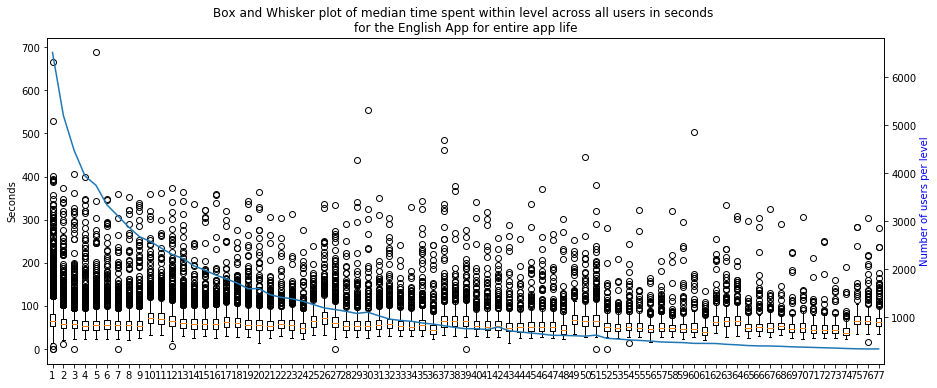

In [30]:
#####box and whisker of times per level across all users
usersPerLevel = dict()
levelsMonth = dict()
for i in englishAllDict:
    for j in englishAllDict[i]:
        lvl = int(j.split(" ",1)[1])
        if(lvl not in levelsMonth):
            levelsMonth[lvl] =0
            usersPerLevel[lvl] = 0
            for k in englishAllDict[i][j]:
                if(type(k)==int):
                    levelsMonth[lvl] = levelsMonth[lvl] + k
                    usersPerLevel[lvl] = usersPerLevel[lvl] +1
        else:           
            lvl = int(j.split(" ",1)[1])
            for k in englishAllDict[i][j]:
                if(type(k)==int):
                    levelsMonth[lvl] = levelsMonth[lvl] + k
                    usersPerLevel[lvl] = usersPerLevel[lvl] +1
                    
                    
                    

levelsMonth = collections.OrderedDict(sorted(levelsMonth.items()))
usersPerLevel = collections.OrderedDict(sorted(usersPerLevel.items()))

#average
avg = dict()
for i in levelsMonth:
    avg[i] = 0 
    avg[i] = (levelsMonth[i]/usersPerLevel[i])


levelsMarch = dict()

for i in englishAllDict:
    for j in englishAllDict[i]:
        lvl = j
        time = englishAllDict[i][j][0]
        
        if(lvl not in levelsMarch):
            levelsMarch[lvl] = []
            levelsMarch[lvl].append(time)
        else:
            levelsMarch[lvl].append(time)
            
boxLevels = []
for i in levelsMarch:
    boxLevels.append(list(levelsMarch[i]))

fig = plt.figure(1, figsize=(15, 6))
ax = fig.add_subplot(111)

# Create the boxplot
bp = ax.boxplot(boxLevels)
ax2 = ax.twinx()
ax2.plot(usersPerLevel.keys(), usersPerLevel.values())
plt.title("Box and Whisker plot of median time spent within level across all users in seconds \nfor the English App for entire app life")
ax.set_ylabel('Seconds')
ax2.set_ylabel('Number of users per level', color='blue')


Text(0, 0.5, 'Percentaes')

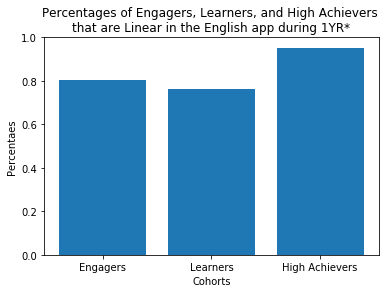

In [31]:
##cohorts linearity 
highALin = linearLevels(highAEnglish)
prcnt = [len(linearEngagersEnglish)/len(englishAllEngagers), len(linearLearnersEnglish)/len(englishAllLearners), len(highALin)/len(highAEnglish)]
types = ['Engagers','Learners', 'High Achievers']
x_pos = np.arange(3)
plt.bar(x_pos, prcnt)
plt.title("Percentages of Engagers, Learners, and High Achievers \nthat are Linear in the English app during 1YR*")
plt.xticks(x_pos, types)
plt.xlabel('Cohorts')
plt.ylabel('Percentaes')

Text(0.5, 0, 'Levels')

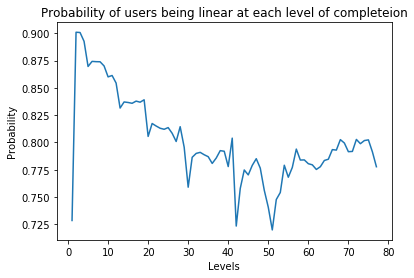

In [32]:
####Graph of all levels with each level showing the probability of users, 
####who have completed that level, being linear
englishLevels = dict()
for i in highAEnglish:
    for j in highAEnglish[i]:
        if(j not in englishLevels):
            englishLevels[j]=[]


for i in englishAllDict:
    for j in englishAllDict[i]:
        if(englishAllDict[i][j][1]=='Success'):
            englishLevels[j].append(i)

probabilityLinear = dict()
for i in englishLevels:
    linearCount = 0
    for j in englishLevels[i]:
        if(j in linearEnglish):
            linearCount +=1
    probabilityLinear[i] = linearCount/len(englishLevels[i])
    
lvls  = np.arange(start = 1,stop=78)
plt.plot(lvls, probabilityLinear.values())
plt.title("Probability of users being linear at each level of completeion")
plt.ylabel('Probability')
plt.xlabel('Levels')


In [42]:
#################hares vs tortoises

###hares are users who spend a total of at least X1 secs over a window of at most Y1 consecutive days
###tortoises are users who spend at most X2 secs per day, for at least Y2 days, over a window of Z2 days

###the following haresTable and tortTable are a way of determining the optimal X and Y values for hares and tortoises


In [47]:
###table to determine optimal hares values
haresEnglish = dict()

haresTable = pd.DataFrame(columns=[1,2,3,4])
zeros = [0]*4
haresSec = [1000,1500,2000,2500]
for i in haresSec:
    haresTable.loc[i] = zeros
for i in [1,2,3,4]:
    haresTable[i] = haresTable.astype(int)
  
for i in englishAllDict:
    timePerDay = dict()
    for j in englishAllDict[i]:
        if(englishAllDict[i][j][2][:10] not in timePerDay):
            timePerDay[englishAllDict[i][j][2][:10]] = englishAllDict[i][j][0]
        else:
            timePerDay[englishAllDict[i][j][2][:10]] += englishAllDict[i][j][0]
            
    days = list(timePerDay.keys())
    time = list(timePerDay.values())
    
    count = 0 
    while(count<len(days)-1):
        if(time[count]>=1000):
            haresTable.at[1000,1] += 1
            haresEnglish[i] = copy.deepcopy(englishAllDict[i])
            count = len(days)
        count+=1
    
    count = 0 
    while(count<len(days)-1):
        if(time[count]>=1500):
            haresTable.at[1500,1] += 1
            haresEnglish[i] = copy.deepcopy(englishAllDict[i])
            count = len(days)
        count+=1
        
    count = 0   
    while(count<len(days)-1):
        if(time[count]>=2000):
            haresTable.at[2000,1] += 1
            haresEnglish[i] = copy.deepcopy(englishAllDict[i])
            count = len(days)
        count+=1

    count = 0 
    while(count<len(days)-1):
        if(time[count]>=2500):
            haresTable.at[2500,1] += 1
            haresEnglish[i] = copy.deepcopy(englishAllDict[i])
            count = len(days)
        count+=1
        
    count = 0 
    while(count<len(days)-1):
        if(len(days)==1):
            if(time>=1000):
                haresTable.at[1500,len(timePerDay)] += 1
            if(time>=1500):
                haresTable.at[1500,len(timePerDay)] += 1
            if(time>=2000):
                haresTable.at[2000,len(timePerDay)] += 1
            if(time>=2500):
                haresTable.at[2500,len(timePerDay)] += 1
        
            count = len(days)
        
        if(count+3<len(days)):
            d1 = datetime.strptime(days[count], "%m/%d/%Y")
            d2 = datetime.strptime(days[count+1], "%m/%d/%Y")
            d3 = datetime.strptime(days[count+2], "%m/%d/%Y")
            d4 = datetime.strptime(days[count+3], "%m/%d/%Y")
            
            if(d4.toordinal()-d3.toordinal()==d3.toordinal()-d2.toordinal()==d2.toordinal()-d1.toordinal()==1):
                total = time[count] + time[count+1] + time[count+2] + time[count+2]
                if(total>=1000):
                    haresTable.at[1000,4] += 1
                    count = len(days)
                if(total>=1500):
                    haresTable.at[1500,4] += 1
                    count = len(days)
                if(total>=2000):
                    haresTable.at[2000,4] += 1
                    count = len(days)
                if(total>=2500):
                    haresTable.at[2500,4] += 1
                    count = len(days)
                    
        count += 1
                    
    count = 0            
    while(count<len(days)-1): 
        if(len(days)==1):
            if(time>=1000):
                haresTable.at[1500,len(timePerDay)] += 1
            if(time>=1500):
                haresTable.at[1500,len(timePerDay)] += 1
            if(time>=2000):
                haresTable.at[2000,len(timePerDay)] += 1
            if(time>=2500):
                haresTable.at[2500,len(timePerDay)] += 1
            

        if(count+2<len(days)):
            d1 = datetime.strptime(days[count], "%m/%d/%Y")
            d2 = datetime.strptime(days[count+1], "%m/%d/%Y")
            d3 = datetime.strptime(days[count+2], "%m/%d/%Y")
            
            if(d3.toordinal()-d2.toordinal()==d2.toordinal()-d1.toordinal()==1):
                total = time[count] + time[count+1] +time[count+2]
                if(total>=1000):
                    haresTable.at[1000,3] += 1
                    count = len(days)
                if(total>=1500):
                    haresTable.at[1500,3] += 1
                    count = len(days)
                if(total>=2000):
                    haresTable.at[2000,3] += 1
                    count = len(days)
                if(total>=2500):
                    haresTable.at[2500,3] += 1
                    count = len(days)
                
        count += 1
    
    count = 0
    while(count<len(days)-1): 
        if(len(days)==1):
            if(time>=1000):
                haresTable.at[1500,len(timePerDay)] += 1
            if(time>=1500):
                haresTable.at[1500,len(timePerDay)] += 1
            if(time>=2000):
                haresTable.at[2000,len(timePerDay)] += 1
            if(time>=2500):
                haresTable.at[2500,len(timePerDay)] += 1
        
    
        d1 = datetime.strptime(days[count], "%m/%d/%Y")
        d2 = datetime.strptime(days[count+1], "%m/%d/%Y")
        
        if(d2.toordinal()-d1.toordinal()==1):
            total = time[count] + time[count+1]
            if(total>=1000):
                haresTable.at[1000,2] += 1
                count = len(days)
            if(total>=1500):
                haresTable.at[1500,2] += 1
                count = len(days)
            if(total>=2000):
                haresTable.at[2000,2] += 1
                count = len(days)
            if(total>=2500):
                haresTable.at[2500,2] += 1
                count = len(days)
            
        count +=1
        
print(haresTable)

###based on the values in the table, we choose hares to be users who spend at least 1000 seconds over a single day

        1    2    3   4
1000  797  673  226  62
1500  393  435  179  52
2000  191  275  127  44
2500   89  171   93  34


In [35]:
###table to determine optimal tortoise values - for this analysis the window Z2 will be the entire span of the 1YR*
            
tortsEnglish = dict()
 
tortTable = pd.DataFrame(columns=[3,4,5,6,7,8,9,10])
zeros = [0]*8
tortSec = [60,100,150,200,300,400,500]
for i in tortSec:
    tortTable.loc[i] = zeros
for i in [3,4,5,6,7,8,9,10]:
    tortTable[i] = tortTable.astype(int)

for i in englishAllDict:
    timePerDay = dict()
    for j in englishAllDict[i]:
        if(englishAllDict[i][j][2] not in timePerDay):
            timePerDay[englishAllDict[i][j][2]] = englishAllDict[i][j][0]
        else:
            timePerDay[englishAllDict[i][j][2]] += englishAllDict[i][j][0]
    
    count60 = 0
    for k in timePerDay:
        if(timePerDay[k]>=60):
            count60 +=1 
            
    if(count60>2):
        tortTable.at[60,3] += 1
        if(count60>3):
            tortTable.at[60,4] += 1
        if(count60>4):
            tortTable.at[60,5] += 1
        if(count60>5):
            tortTable.at[60,6] += 1
        if(count60>6):
            tortTable.at[60,7] += 1
        if(count60>7):
            tortTable.at[60,8] += 1
        if(count60>8):
            tortTable.at[60,9] += 1
        if(count60>9):
            tortTable.at[60,10] += 1
        if(count60>10):
            tortTable.at[60,10] += 1
            
    
    count100 = 0
    for k in timePerDay:
        if(timePerDay[k]>100):
            count100 +=1 
            
    if(count100>2):
        tortTable.at[100,3] += 1
        if(count100>3):
            tortTable.at[100,4] += 1
        if(count100>4):
            tortTable.at[100,5] += 1
        if(count100>5):
            tortTable.at[100,6] += 1
        if(count100>6):
            tortTable.at[100,7] += 1
        if(count100>7):
            tortTable.at[100,8] += 1
        if(count100>8):
            tortTable.at[100,9] += 1
        if(count100>9):
            tortTable.at[100,10] += 1
        if(count100>10):
            tortTable.at[100,10] += 1
            
    count150 = 0
    for k in timePerDay:
        if(timePerDay[k]>150):
            count150 +=1 
            
    if(count150>2):
        tortTable.at[150,3] += 1
        if(count150>3):
            tortTable.at[150,4] += 1
            tortsEnglish[i] = copy.deepcopy(englishAllDict[i])
        if(count150>4):
            tortTable.at[150,5] += 1
        if(count150>5):
            tortTable.at[150,6] += 1
        if(count150>6):
            tortTable.at[150,7] += 1
        if(count150>7):
            tortTable.at[150,8] += 1
        if(count150>8):
            tortTable.at[150,9] += 1
        if(count150>9):
            tortTable.at[150,10] += 1
        if(count150>10):
            tortTable.at[150,10] += 1

    count200 = 0
    for k in timePerDay:
        if(timePerDay[k]>200):
            count200 +=1
            
    if(count200>2):
        tortTable.at[200,3] += 1
        if(count200>3):
            tortTable.at[200,4] += 1
        if(count200>4):
            tortTable.at[200,5] += 1
        if(count200>5):
            tortTable.at[200,6] += 1
        if(count200>6):
            tortTable.at[200,7] += 1
        if(count200>7):
            tortTable.at[200,8] += 1
        if(count200>8):
            tortTable.at[200,9] += 1
        if(count200>9):
            tortTable.at[200,10] += 1
        if(count200>10):
            tortTable.at[200,10] += 1
            
    count300 = 0
    for k in timePerDay:
        if(timePerDay[k]>300):
            count300 +=1
    
    if(count300>2):
        tortTable.at[300,3] += 1
        if(count300>3):
            tortTable.at[300,4] += 1
        if(count300>4):
            tortTable.at[300,5] += 1
        if(count300>5):
            tortTable.at[300,6] += 1
        if(count300>6):
            tortTable.at[300,7] += 1
        if(count300>7):
            tortTable.at[300,8] += 1
        if(count300>8):
            tortTable.at[300,9] += 1
        if(count300>9):
            tortTable.at[300,10] += 1
        if(count300>10):
            tortTable.at[300,10] += 1
            
            
    count400 = 0
    for k in timePerDay:
        if(timePerDay[k]>400):
            count400 +=1
    
    if(count400>2):
        tortTable.at[400,3] += 1
        if(count400>3):
            tortTable.at[400,4] += 1
        if(count400>4):
            tortTable.at[400,5] += 1
        if(count400>5):
            tortTable.at[400,6] += 1
        if(count400>6):
            tortTable.at[400,7] += 1
        if(count400>7):
            tortTable.at[400,8] += 1
        if(count400>8):
            tortTable.at[400,9] += 1
        if(count400>9):
            tortTable.at[400,10] += 1
        if(count400>10):
            tortTable.at[400,10] += 1
    
    count500 = 0
    for k in timePerDay:
        if(timePerDay[k]>500):
            count500 +=1
            
    if(count500>2):
        tortTable.at[500,3] += 1
        if(count500>3):
            tortTable.at[500,4] += 1
        if(count500>4):
            tortTable.at[500,5] += 1
        if(count500>5):
            tortTable.at[500,6] += 1
        if(count500>6):
            tortTable.at[500,7] += 1
        if(count500>7):
            tortTable.at[500,8] += 1
        if(count500>8):
            tortTable.at[500,9] += 1
        if(count500>9):
            tortTable.at[500,10] += 1
        if(count500>10):
            tortTable.at[500,10] += 1

print(tortTable)

###Even though, tortoises spend less time than hares, we want to consider tortoises that have used the game long enough
###to be learners. Therefore the time spent per day with the number of days should give us a total of 600 seconds. 
###There are two suitable candidates, tortoises who spend 200 seconds over 3 days and tortoises who spend 150 seconds over 
###4 days. While the former yields more users, we will choose the latter as it will give a even number of hares and tortoises
###when accounting for overap (hares that are also tortoises).

       3    4    5    6    7    8    9    10
60   1632  941  585  379  253  183  118  121
100  1263  714  422  268  164  107   68   59
150  1000  547  294  176  105   60   31   23
200   829  412  220  125   61   33   13    5
300   548  244  126   48   15    9    2    0
400   395  155   55   18    4    0    0    0
500   278   83   16    2    1    0    0    0


In [48]:
##now that the torts and hares dictionaries are filled with the appropriate users, we need to
##remove users from hares who are both hares and tortoises. 

dups = []
for i in tortsEnglish:
    if i in haresEnglish:
        dups.append(i)
        
for i in dups:
    haresEnglish.pop(i, 'None')
    
print("The number of hares is: " + str(len(haresEnglish)))
print("The number of tortoises is: " + str(len(tortsEnglish)))

The number of hares is: 508
The number of tortoises is: 547


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.094
Model:                            OLS   Adj. R-squared:                  0.082
Method:                 Least Squares   F-statistic:                     7.813
Date:                Thu, 22 Aug 2019   Prob (F-statistic):            0.00658
Time:                        12:49:28   Log-Likelihood:                -261.39
No. Observations:                  77   AIC:                             526.8
Df Residuals:                      75   BIC:                             531.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         60.2990      1.682     35.850      0.0

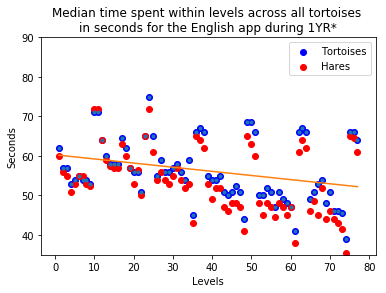

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.170
Model:                            OLS   Adj. R-squared:                  0.159
Method:                 Least Squares   F-statistic:                     15.33
Date:                Thu, 22 Aug 2019   Prob (F-statistic):           0.000197
Time:                        12:49:28   Log-Likelihood:                -262.14
No. Observations:                  77   AIC:                             528.3
Df Residuals:                      75   BIC:                             533.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         59.5432      1.698     35.058      0.0

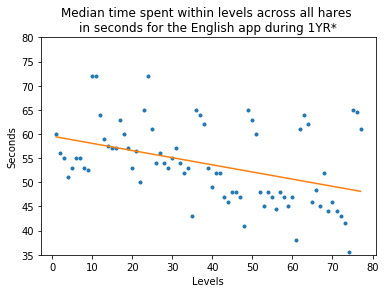

In [38]:
###dictionaries of levels completed by torts and hares vs the time at each level
tortsLevels = dict()
for i in tortsEnglish:
    for j in tortsEnglish[i]:
        if(tortsEnglish[i][j][1]=='Success'):
            lvl = int(j[6:])
            if(lvl not in tortsLevels):
                tortsLevels[lvl] = []
                tortsLevels[lvl].append(tortsEnglish[i][j][0])
            else:
                tortsLevels[lvl].append(tortsEnglish[i][j][0])
tortsLevels = dict(collections.OrderedDict(sorted(tortsLevels.items())))            

haresLevels = dict()
for i in haresEnglish:
    for j in haresEnglish[i]:
        if(haresEnglish[i][j][1]=='Success'):
            lvl = int(j[6:])
            if(lvl not in haresLevels):
                haresLevels[lvl]=[]
                haresLevels[lvl].append(haresEnglish[i][j][0])
            else:
                haresLevels[lvl].append(haresEnglish[i][j][0])
haresLevels = dict(collections.OrderedDict(sorted(haresLevels.items()))) 

##################################plot of median time for each level + regression analysis    

medTortsEnglish = dict()
for i in tortsLevels:
    medTortsEnglish[i] = (median(tortsLevels[i]))

medHaresEnglish = dict()
for i in haresLevels:
    medHaresEnglish[i] = (median(haresLevels[i]))
    
fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(medTortsEnglish.keys(), medTortsEnglish.values(),  c='b')
ax.scatter(medHaresEnglish.keys(), medHaresEnglish.values(),  c='r')
ax.set_xlabel('Levels')
ax.set_ylabel('Seconds')
ax.set_title("Time per level for Tortoises and Hares in the English App during 1YR*")
ax.legend(['Tortoises','Hares'])
    
    
x = np.arange(start = 1, stop =78)
torty = list(medTortsEnglish.values())
model1 = sm.OLS(torty, x)
x = sm.add_constant(x)
model1 = sm.OLS(torty, x)
results = model1.fit()
print(results.summary())

x = np.arange(start = 1, stop =78)
b, m = polyfit(x, torty, 1)
plt.plot(x, torty, '.')
plt.plot(x, b + m * x, '-')
plt.ylim([35,90])
plt.title("Median time spent within levels across all tortoises \nin seconds for the English app during 1YR*")
plt.xlabel("Levels")
plt.ylabel("Seconds")
plt.show()

x = np.arange(start = 1, stop =78)
haresy = list(medHaresEnglish.values())
model2 = sm.OLS(haresy, x)
x = sm.add_constant(x)
model2 = sm.OLS(haresy, x)
results = model2.fit()
print(results.summary())

x = np.arange(start = 1, stop =78)
b, m = polyfit(x, haresy, 1)
plt.plot(x, haresy, '.')
plt.plot(x, b + m * x, '-')
plt.ylim([35,80])
plt.title("Median time spent within levels across all hares \nin seconds for the English app during 1YR*")
plt.xlabel("Levels")
plt.ylabel("Seconds")
plt.show()


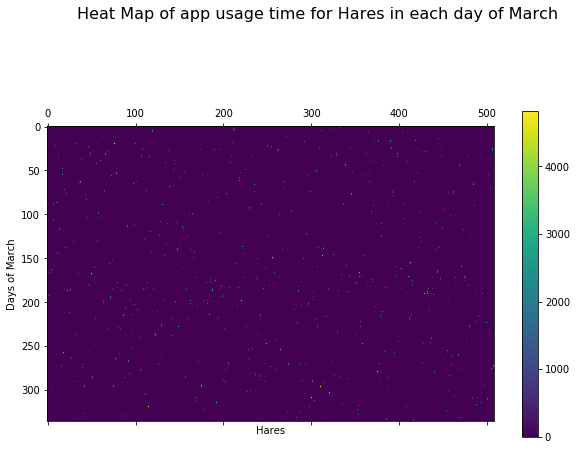

In [39]:
###graph of hares
haresDaysEnglish = pd.DataFrame(columns=allDays)
zeros = [0]*len(allDays)

for i in haresEnglish:
    haresDaysEnglish.loc[i] = zeros
    
for i in allDays:
    haresDaysEnglish[i] = haresDaysEnglish.astype(int)
    
  

for i in haresEnglish:
    for j in haresEnglish[i]:
        month = int(haresEnglish[i][j][2][:2])
        dd = int(haresEnglish[i][j][2][3:5])
        year = int(haresEnglish[i][j][2][6:10])
        d0 = date(2018, 9, 2)
        d1 = date(year, month, dd)
        delta = d1 - d0
        day = delta.days
        time = haresEnglish[i][j][0]
        haresDaysEnglish.at[i, day] += time

fig = plt.figure(1, figsize=(10, 6))
ax = fig.add_subplot(111)
cax = ax.matshow(haresDaysEnglish.transpose(), interpolation='nearest')
fig.colorbar(cax)
plt.ylabel("Days of March")
plt.xlabel("Hares", y =1.2)
plt.suptitle("Heat Map of app usage time for Hares in each day of March", size=16, y=1.12);      
plt.show()

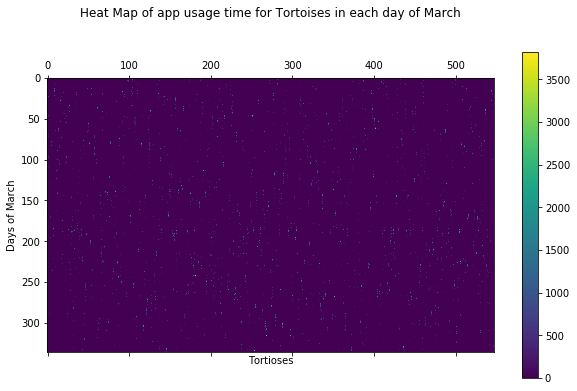

In [40]:
###graph of tortoises
tortsDaysEnglish = pd.DataFrame(columns=allDays)
zeros = [0]*len(allDays)

for i in tortsEnglish:
    tortsDaysEnglish.loc[i] = zeros
    
for i in allDays:
    tortsDaysEnglish[i] = tortsDaysEnglish.astype(int)
    
  

for i in tortsEnglish:
    for j in tortsEnglish[i]:
        month = int(tortsEnglish[i][j][2][:2])
        dd = int(tortsEnglish[i][j][2][3:5])
        year = int(tortsEnglish[i][j][2][6:10])
        d0 = date(2018, 9, 2)
        d1 = date(year, month, dd)
        delta = d1 - d0
        day = delta.days
        time = tortsEnglish[i][j][0]
        tortsDaysEnglish.at[i, day] += time
        
fig = plt.figure(1, figsize=(10, 6))
ax = fig.add_subplot(111)
cax = ax.matshow(tortsDaysEnglish.transpose(), interpolation='nearest')
fig.colorbar(cax)
plt.ylabel("Days of March")
plt.xlabel("Tortioses")
plt.title("Heat Map of app usage time for Tortoises in each day of March", y = 1.2)
plt.show()


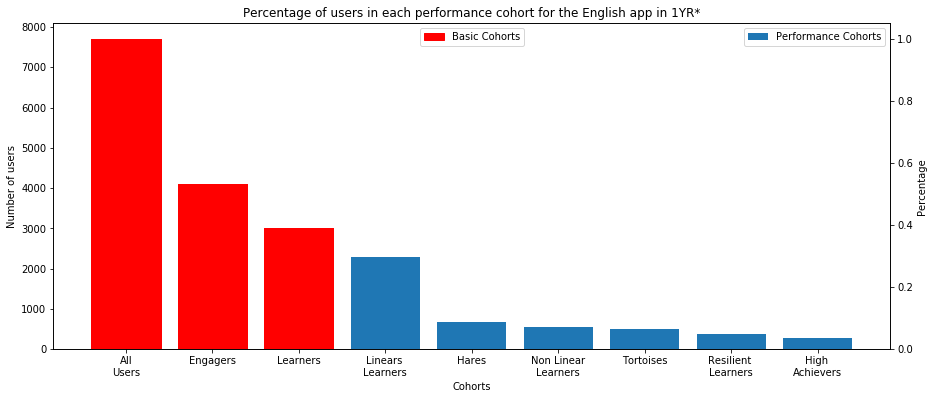

In [41]:
###english all cohorts percentages

allUsersEnglish = len(englishAllDict)

performanceCohorts = ['High \nAchievers', 'Resilient \nLearners','Tortoises','Non Linear\nLearners',
                     'Hares','Linears \nLearners', 'Learners','Engagers', 'All\nUsers']

performanceCohorts.reverse()

englishPerformanceCohorts = [allUsersEnglish/allUsersEnglish, len(englishAllEngagers)/allUsersEnglish,  
len(englishAllLearners)/allUsersEnglish, len(resEnglishAllLearners)/allUsersEnglish, len(highAEnglish)/allUsersEnglish, 
len(linearLearnersEnglish)/allUsersEnglish, len(nonLinearLearnersEnglish)/allUsersEnglish, len(tortsEnglish)/allUsersEnglish, len(haresEnglish)/allUsersEnglish]

englishPerformanceCohortsCounts = [allUsersEnglish, len(englishAllEngagers), len(englishAllLearners), len(resEnglishAllLearners), 
len(highAEnglish), len(linearLearnersEnglish), len(nonLinearLearnersEnglish),len(tortsEnglish), len(haresEnglish)]

englishPerformanceCohorts.sort(reverse = True)
englishPerformanceCohortsCounts.sort(reverse = True)

fig = plt.figure(1, figsize=(15, 6))
ax = fig.add_subplot(111)

barlist=ax.bar(performanceCohorts, englishPerformanceCohortsCounts)
ax.legend(['Performance Cohorts'])
barlist[0].set_color('r')
barlist[1].set_color('r')
barlist[2].set_color('r')
ax2 = ax.twinx()
barlist2 =ax2.bar(performanceCohorts,englishPerformanceCohorts)
barlist2[0].set_color('r')
barlist2[1].set_color('r')
barlist2[2].set_color('r')
plt.tick_params(axis='x', labelrotation=90)
plt.title("Percentage of users in each performance cohort for the English app in 1YR*")
ax.set_xlabel("Cohorts")
ax.set_ylabel('Number of users')
ax2.set_ylabel('Percentage')
ax2.legend(['Basic Cohorts'], loc = 9)
plt.show()

